![Computational Modelling for Predict Repeat General Anaesthesia in Paediatric Dentistry Patients](Images/Main.jpg)

<p style="font-size:30px;text-align:center;color:rgba(78,6,176,255)">Computational Modelling for Predict Repeat General Anaesthesia </p>
<p style="font-size:30px;text-align:center;color:rgba(78,6,176,255)">in Paediatric Dentistry Patients </p>

<p style="font-size:15px;text-align:center;color:rgba(78,6,176,255)">Spring 2023</p>

<h1>1-Objective:</h1>

The objective of this research project is to develop a predictive model using machine learning techniques to identify factors associated with repeat general anaesthesia (GA) in paediatric dentistry patients. The model will provide valuable insights into the risk factors and contribute to optimizing treatment planning and patient management strategies in dental practices.

⬇Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

📌 My Functions & Classes

Notebook Color Scheme:


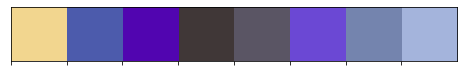

In [7]:
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'
my_colors = ["#f2d68f", "#4c5bac", "#5105b0", "#403737", "#5a5564" ,"#6b48d4","#7484ae","#a4b4dc"]
sns.palplot(sns.color_palette(my_colors))
print(clr.S+"Notebook Color Scheme:"+clr.E)
plt.show()

<h1>1-The Data & EDA</h1>

📝 we have two datasets.One for patients who had only once GA. Another one for others that more than once GA.<br>
let's have look to all of them.

In [8]:
#Read Data in DataFrame
df1=pd.read_csv("Data\Dental GA research - Copy.csv")
df2=pd.read_csv("Data\Repeat.csv")

📝 df1 consists of data for patients who had only once GA 

In [9]:
df1.head(5)

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)","REPEAT GA(Yes=1, No=0)"
0,1,1.0,8.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
1,2,0.0,6.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
2,3,0.0,7.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
3,4,0.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
4,5,0.0,7.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0


In [10]:
print(clr.S+"The dataset has a size of:"+clr.E, df1.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df1.isna().sum()

The dataset has a size of: (330, 10) 

Missing values:


ID                                                                            0
medical History (Yes=1, No=0)                                                23
age                                                                          23
regular attender (Yes=1, No=0)                                               23
Socioeconomic status(Low=1, Moderate=2, High=3)                              23
Ease of Access (Yes=1, No=0)                                                 23
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        23
Justification for GA(Yes=1, No=0)                                            23
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    23
REPEAT GA(Yes=1, No=0)                                                       23
dtype: int64

📝 It seems that we have 23 records that all of them are Nan. so let's drop them.

In [14]:
df1.dropna(inplace=True)

print(clr.S+"The dataset has a size of:"+clr.E, df1.shape, "\n")
print(clr.S+"Missing values:"+clr.E)
df1.isna().sum()

The dataset has a size of: (307, 10) 

Missing values:


ID                                                                           0
medical History (Yes=1, No=0)                                                0
age                                                                          0
regular attender (Yes=1, No=0)                                               0
Socioeconomic status(Low=1, Moderate=2, High=3)                              0
Ease of Access (Yes=1, No=0)                                                 0
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        0
Justification for GA(Yes=1, No=0)                                            0
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    0
REPEAT GA(Yes=1, No=0)                                                       0
dtype: int64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: Great News!!!Now, It seems that don't have missing values 🎉</p
</div>

📝 df2 consists of data for patients who had Repeated GA 

In [15]:
df2.head(5)

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)","REPEAT GA(Yes=1, No=0)"
0,1,0,6,0,3,1,0,1,0,2
1,2,0,5,0,3,1,1,1,0,2
2,3,0,5,0,3,1,0,1,0,2
3,4,0,4,0,2,0,1,1,0,2
4,5,0,6,0,3,1,1,1,0,2


In [17]:
print(clr.S+"The dataset has a size of:"+clr.E, df2.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
df2.isna().sum()

The dataset has a size of: (62, 10) 

Missing values:


ID                                                                           0
medical History (Yes=1, No=0)                                                0
age                                                                          0
regular attender (Yes=1, No=0)                                               0
Socioeconomic status(Low=1, Moderate=2, High=3)                              0
Ease of Access (Yes=1, No=0)                                                 0
PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                        0
Justification for GA(Yes=1, No=0)                                            0
Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)    0
REPEAT GA(Yes=1, No=0)                                                       0
dtype: int64

In [7]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 10 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   ID                                                                         330 non-null    int64  
 1   medical History (Yes=1, No=0)                                              307 non-null    float64
 2   age                                                                        307 non-null    float64
 3   regular attender (Yes=1, No=0)                                             307 non-null    float64
 4   Socioeconomic status(Low=1, Moderate=2, High=3)                            307 non-null    float64
 5   Ease of Access (Yes=1, No=0)                                               307 non-null    float64
 6   PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                     

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)","REPEAT GA(Yes=1, No=0)"
0,1,1.0,8.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
1,2,0.0,6.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0
2,3,0.0,7.0,0.0,3.0,1.0,1.0,1.0,0.0,1.0
3,4,0.0,5.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
4,5,0.0,7.0,0.0,3.0,1.0,0.0,1.0,0.0,1.0


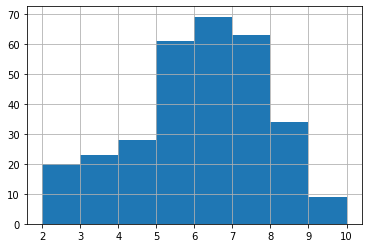

In [13]:
df1["age"].hist(bins=8)
plt.show()

In [8]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 10 columns):
 #   Column                                                                     Non-Null Count  Dtype
---  ------                                                                     --------------  -----
 0   ID                                                                         62 non-null     int64
 1   medical History (Yes=1, No=0)                                              62 non-null     int64
 2   age                                                                        62 non-null     int64
 3   regular attender (Yes=1, No=0)                                             62 non-null     int64
 4   Socioeconomic status(Low=1, Moderate=2, High=3)                            62 non-null     int64
 5   Ease of Access (Yes=1, No=0)                                               62 non-null     int64
 6   PRETREATMENT RADIOGRAPHS(Yes=1, No=0)                                      6

,ID,"medical History (Yes=1, No=0)",age,"regular attender (Yes=1, No=0)","Socioeconomic status(Low=1, Moderate=2, High=3)","Ease of Access (Yes=1, No=0)","PRETREATMENT RADIOGRAPHS(Yes=1, No=0)","Justification for GA(Yes=1, No=0)","Type of GA list (RESTORATIVE=0, Composite=1,crowns =2, Extraction only=3)","REPEAT GA(Yes=1, No=0)"
0,1,0,6,0,3,1,0,1,0,2
1,2,0,5,0,3,1,1,1,0,2
2,3,0,5,0,3,1,0,1,0,2
3,4,0,4,0,2,0,1,1,0,2
4,5,0,6,0,3,1,1,1,0,2


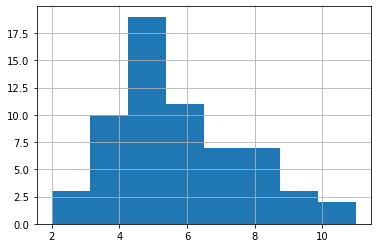

In [14]:
df2["age"].hist(bins=8)
plt.show()